## Online hackaton. P&G. Made By Slavnyi Bogdan
E-mail: slavnyi.bogdan@gmail.com

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
%config Completer.use_jedi = False

## Task 1. Checking the data for completeness

As a P&G Data Analyst, your first step is to
learn to determine the completeness of the source data.
In the morning you received a letter from the manager with instructions on how to
tasks.


Hey!
We need to analyze the purchase history data. We are currently planning to launch a project
work with scanned customer receipts that they upload to receive
cashback and prizes under the Cashback 10% loyalty program.
We want to examine the data of scanned checks for completeness (data set
attached in an attachment), that is, count the number of lines containing empty or
missing values, which are denoted as NaN2 and display their share as a percentage of
the total number of lines in the file.


hints. When working with large data sets, it is convenient to use Python. Below is
code to help you read the file:  
df = pd.read_csv('Case Data.csv', sep=",")  
print(df)  


Your task is to complete the code so that it counts and prints the number of rows with NaN values, and also indicates which columns contain the most empty rows. For
To do this, use the isna() method (isnull for pandas < 0.21.0). To calculate the total
number of rows and columns, you can use the df.shape method.
Leave a few lines of comments in the code file about which columns contain more
of all NaN values.
Our IT team is counting on you.

In [4]:
df = pd.read_csv('Case Data.csv')

In [5]:
df.head(2)

﻿id чека      Дата и время         ИНН  \
0  0000a622f9c8f1821ca549fbcfd47405  21.12.2019 15:15  2310031475   
1  0000a622f9c8f1821ca549fbcfd47405  21.12.2019 15:15  2310031475   

                     IDПользователя  \
0  2700449a73d4cb9d8e909c706bf16fbe   
1  2700449a73d4cb9d8e909c706bf16fbe   

                                              Товар     Бренд  \
0  libresse natural care ultra прокладки normal 10ш  libresse   
1  pampers трусики-подг 5 junior 12-17/15-18кг 96шт   pampers   

                                            Теги    Цена  Кол-во   Сумма  \
0  личная гигиена; красота и здоровье; прокладки    63.2     2.0   126.4   
1                                            NaN  1549.0     1.0  1549.0   

   Кэшбэк  
0     NaN  
1   154.9

In [6]:
df.shape

(309707, 11)

In [7]:
# Rename the columns for easier navigation (so that there is 1 word that can be easily selected with a double click)
df = df.rename(columns={'﻿id чека': 'check_id', 'Дата и время': 'datetime', 'ИНН': 'inn', 'IDПользователя': 'customer_id',
                  'Товар': 'product_name', 'Бренд': 'brand', 'Теги': 'tags', 'Цена': 'price', 'Кол-во': 'quantity',
                  'Сумма': 'total_sales', 'Кэшбэк': 'cashback'})

In [8]:
# Convert column to "datetime" format
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
# Number of missing values
df.isna().sum()

check_id             0
datetime             0
inn                  0
customer_id          0
product_name         0
brand           178495
tags            128391
price               52
quantity            52
total_sales         52
cashback        253552
dtype: int64

In [10]:
# Percentage of missing values
df.isna().sum() / df.shape[0] * 100

check_id         0.000000
datetime         0.000000
inn              0.000000
customer_id      0.000000
product_name     0.000000
brand           57.633505
tags            41.455634
price            0.016790
quantity         0.016790
total_sales      0.016790
cashback        81.868347
dtype: float64

In [11]:
df.shape

(309707, 11)

In [12]:
# We have "; " in tags, which is equivalent to "NaN" values.
df.query('tags == "; "').head(3)

check_id            datetime         inn  \
50  00036ba1eec6bddcbaf0fa19d36eac4c 2020-01-25 09:49:00  2310031475   
54  00036ba1eec6bddcbaf0fa19d36eac4c 2020-01-25 09:49:00  2310031475   
55  00036ba1eec6bddcbaf0fa19d36eac4c 2020-01-25 09:49:00  2310031475   

                         customer_id                          product_name  \
50  594d76aa83fd5501fdf12006d3356d29  aura ватные палочки classic эконом 4   
54  594d76aa83fd5501fdf12006d3356d29  raid антимоль подвеска весен цвет 4ш   
55  594d76aa83fd5501fdf12006d3356d29  контейнер 0,8л д/пищ. прод.(спецторг   

   brand tags  price  quantity  total_sales  cashback  
50  aura   ;    55.0       2.0        110.0       NaN  
54   NaN   ;    71.2       1.0         71.2       NaN  
55   NaN   ;    76.3       1.0         76.3       NaN

In [13]:
# Equate ";" to NaN
print(df['tags'].str.strip().replace(';', np.nan).isna().sum())
print(df['tags'].str.strip().replace(';', np.nan).isna().sum() / df.shape[0] * 100)

130598
42.16824288763251


## Answer to task 1
Most of all NA values contain such columns as "cashback" - 253 552, "brand" - 178 495 , "tags" - 130 598 values. Which is 81.9%, 57.6% and 42.2% empty lines respectively.

## Task 2. Search for association rules

Upon successful completion of the analysis of the source data for completeness, you
you need to understand how to use Python to compose associative
rules.

In the mail, you found a new letter from the IT team with the production
next task.

Hey!

As a second assignment in the role of Data Analyst, we invite you to get acquainted with
association rules.

**Association Rules Learning**, or **Associations Rules Learning (ARL)** takes place on
a rule base that helps discover relationships between customer transactions across
purchase history data. ARL analyzes the checks of individual consumers and identifies
relationship rules. For example, if 80% of customers who have pizza on their receipt take and
toothbrushes, then the following rule is obtained: "Buying a pizza is a condition for
buying toothbrushes. At the same time, 80% is our confidence in the rule. But it happens
it is useful to take into account not only confidence, but also support. Support is share
buyers who took pizza and toothbrushes together, out of the total number of customers.

hints. For ARL, Python has the efficient_apriori library. If you import from there
A priori algorithm3, then you can learn how to make basic rules. Before applying
a priori in Python, you need to fill NaN values ​​using the fillna method, and then
group tags only for unique check IDs (pay attention to groupby).
After that, you need to form a sheet of grouped values ​​using
list(map(tuple, grouped_values)). Finally, one can refer to a priori, however
the function asks for the minimum value of support and confidence. Try different
values ​​for min_support. Remember that if the support is high, then it is probably about
obvious rule. These are not always of interest to analysts, since they are well known.

Support that is too low indicates insufficient data to conduct
statistical analysis, so rules with low support are also rarely used.
Also don't forget to print lift, support, confidence for one rule using a loop
with for and print.
As usual, we are waiting for the code with the completed task, where you must leave comments on
selected values ​​of support and confidence.
Thanks!

In [14]:
from efficient_apriori import apriori

In [15]:
df['tags'].nunique()

10149

In [16]:
# We have 42.2% gaps in tags (which is quite a lot). Therefore, we will try to supplement them.
# If the tags contain NaN values, first try to populate them with the brand,
# because a brand can be associated with a particular group of products.

df['tags_clean'] = df['tags'].fillna(df['brand']).fillna('0').str.strip().replace(';', '0')

In [17]:
# with this treatment, I reduced the percentage of skips from 42.2% to 36.8%
df['tags_clean'].replace('0', np.nan).isna().sum() / df.shape[0] * 100

36.766363046363175

In [18]:
# The percentage of omissions is still quite high. Let's try adding more tags.
# The full name of the product is written in Russian.
# Usually brands are called in English. Let's try to choose the first word entirely written in Latin in the product name.
# Most likely it will be a brand
alphabet = 'abcdefghijklmnopqrstuvwxyz'

def check_english_words(string):
    product_list = string.split(' ')
    product_list = [i.strip() for i in product_list]
    for word in product_list:
        count_english = 0
        for letter in word:
            if letter.lower() in alphabet:
                count_english += 1
                if len(word) == count_english:
                    return word
    return np.nan

df['tags_clean'] = df['tags_clean'].replace('0', np.nan) \
                                    .fillna(df['product_name'].apply(check_english_words)) \
                                    .replace(np.nan, '0')

In [19]:
# Percentage of gaps in tags decreased from 36.8% to 27%
df['tags_clean'].replace('0', np.nan).isna().sum() / df.shape[0] * 100

26.94805089972135

In [20]:
# We have jumbled tags (the same tags can be ordered differently).
# For Python, a list of the same values but in a different order is 2 different lists.
# Sort them alphabetically
def sort_tags(tags):
    tags = [i.strip() for i in tags.split(';')]
    tags.sort()
    tags = '; '.join(tags)
    
    return tags
    
df['tags_clean'] = df['tags_clean'].apply(sort_tags)

In [21]:
# Moreover, the number of unique values is relatively small and equals 5405.
df['tags_clean'].nunique()

5405

In [22]:
# Since we are doing an analysis for the cashback loyalty program, we will remove packaging in the form of packages from the dataset, which
# is in many checks and only gets in the way.
grp_tags = df.query('tags_clean != "0" and tags_clean != "пакеты; прочее; упаковка"').groupby('check_id') \
    .agg({'tags_clean': 'unique'})

In [23]:
# Let's go through the coefficients and see what results the model produces for different values of the coefficients
min_support_list = np.arange(0.01, 1.0, 0.05)
min_confidence_list = np.arange(0.01, 1.0, 0.05)

transactions = list(map(tuple, grp_tags['tags_clean']))

count = 0
for support in min_support_list:
    for confidence in min_confidence_list:
        itemsets, rules = apriori(transactions, min_support=support, min_confidence=confidence)
        if len(rules) > 0:
            print(support, confidence, rules)
            print()
            print()
        count += 1
        if count % 100 == 0:
            print(count)

0.01 0.01 [{красота и здоровье; личная гигиена; прокладки} -> {бумага/салфетки; салфетки; хозяйственные товары}, {бумага/салфетки; салфетки; хозяйственные товары} -> {красота и здоровье; личная гигиена; прокладки}, {дезодорант/антиперсперант; красота и здоровье; личная гигиена} -> {гигиена волос; красота и здоровье; шампунь для волос}, {гигиена волос; красота и здоровье; шампунь для волос} -> {дезодорант/антиперсперант; красота и здоровье; личная гигиена}, {зубная паста; красота и здоровье; уход за полостью рта} -> {гигиена волос; красота и здоровье; шампунь для волос}, {гигиена волос; красота и здоровье; шампунь для волос} -> {зубная паста; красота и здоровье; уход за полостью рта}, {красота и здоровье; личная гигиена; прокладки} -> {гигиена волос; красота и здоровье; шампунь для волос}, {гигиена волос; красота и здоровье; шампунь для волос} -> {красота и здоровье; личная гигиена; прокладки}, {красота и здоровье; личная гигиена; прокладки} -> {дезодорант/антиперсперант; красота и здор

0.01 0.26 [{бумага/салфетки; салфетки; хозяйственные товары} -> {красота и здоровье; личная гигиена; прокладки}, {гель для душа; красота и здоровье; личная гигиена} -> {гигиена волос; красота и здоровье; шампунь для волос}, {кондитерские изделия; конфеты; продукты; хлеб и сладости} -> {красота и здоровье; личная гигиена; прокладки}, {куриное; молоко/сыр/яйца; продукты; яйцо} -> {красота и здоровье; личная гигиена; прокладки}, {бальзам для волос; гигиена волос; красота и здоровье} -> {гигиена волос; красота и здоровье; шампунь для волос}, {продукты; хлеб; хлеб и сладости} -> {красота и здоровье; личная гигиена; прокладки}, {банан; овощи/фрукты/ягоды; продукты; фрукты} -> {красота и здоровье; личная гигиена; прокладки}]


0.01 0.31000000000000005 [{бумага/салфетки; салфетки; хозяйственные товары} -> {красота и здоровье; личная гигиена; прокладки}, {гель для душа; красота и здоровье; личная гигиена} -> {гигиена волос; красота и здоровье; шампунь для волос}, {бальзам для волос; гигиена вол

In [24]:
# We see that in order to increase min_confidence, we have to significantly reduce min_support
# Lower min_support to 0.003 to get more related products with a fairly high confidence value.

transactions = list(map(tuple, grp_tags['tags_clean']))
itemsets, rules = apriori(transactions, min_support=0.003, min_confidence=0.35)

In [25]:
for rule in rules:
    print(rule)
    print()

{soft} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.392, supp: 0.008, lift: 1.781, conv: 1.282)

{зубная щетка; красота и здоровье; уход за полостью рта} -> {зубная паста; красота и здоровье; уход за полостью рта} (conf: 0.379, supp: 0.007, lift: 5.001, conv: 1.489)

{бумага/салфетки; салфетки; хозяйственные товары} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.351, supp: 0.014, lift: 1.595, conv: 1.202)

{красота и здоровье; личная гигиена; салфетки влажные} -> {красота и здоровье; личная гигиена; прокладки} (conf: 0.406, supp: 0.008, lift: 1.844, conv: 1.312)

{горошек; консервы; овощные; продукты} -> {консервы; кукуруза; овощные; продукты} (conf: 0.353, supp: 0.003, lift: 36.447, conv: 1.530)

{овощи; овощи/фрукты/ягоды; перец; продукты} -> {овощи; овощи/фрукты/ягоды; огурцы; продукты} (conf: 0.371, supp: 0.003, lift: 15.926, conv: 1.552)

{овощи; овощи/фрукты/ягоды; продукты; томаты} -> {овощи; овощи/фрукты/ягоды; огурцы; продукты} (conf: 0.406, supp: 0

## Answer to task 2

So let's go in order:
1. **{soft} -> {beauty and health; personal hygiene; spacers} (conf: 0.392, supp: 0.008, lift: 1.781, conv: 1.282)**
If you filter sales by the "soft" tag, this brand produces cotton swabs, paper napkins and towels.
With "soft" in 39.2% of cases, they also take pads from us. Moreover, the probability of taking pads increases by 1.78 times when taking cotton swabs, paper napkins and towels of the "soft" brand.


2. **{toothbrush; beauty and health; oral care} -> {toothpaste; beauty and health; oral care} (conf: 0.379, supp: 0.007, lift: 5.001, conv: 1.489)**
With a toothbrush in 37.9% of cases, we also take toothpaste. Moreover, the probability of taking toothpaste grows 5 times when taking a toothbrush.


3. **{paper/napkins; napkins; household goods} -> {beauty and health; personal hygiene; spacers} (conf: 0.351, supp: 0.014, lift: 1.595, conv: 1.202)**
With napkins in 35.1% of cases, we also take pads. Moreover, the probability of taking pads increases by 1.6 times when taking napkins.


4. **{beauty and health; personal hygiene; wet wipes} -> {beauty and health; personal hygiene; spacers} (conf: 0.406, supp: 0.008, lift: 1.844, conv: 1.312)**
With wet wipes in 40.6% of cases, we also take pads. Moreover, the probability of taking pads increases by 1.8 times when taking wet wipes.


5. **{polka dots; canned food; vegetable; products} -> {canned food; corn; vegetable; products} (conf: 0.353, supp: 0.003, lift: 36.447, conv: 1.530)**
With peas in 35.3% of cases, we also take corn. Moreover, the probability of taking corn grows 36.4 times when taking peas.


6. **{vegetables; vegetables / fruits / berries; pepper; products} -> {vegetables; vegetables / fruits / berries; cucumbers; products} (conf: 0.371, supp: 0.003, lift: 15.926, conv: 1.552)**
Cucumbers are also taken with pepper in 37.1% of cases. Moreover, the probability of taking cucumbers grows 16 times when they take peppers.


7. **{vegetables; vegetables / fruits / berries; products; tomatoes} -> {vegetables; vegetables / fruits / berries; cucumbers; products} (conf: 0.406, supp: 0.009, lift: 17.435, conv: 1.643)**
With tomatoes, in 40.6% of cases, cucumbers are also taken from us. Moreover, the probability of taking cucumbers increases by 17.4 times when taking tomatoes.


8. **{vegetables; vegetables / fruits / berries; cucumbers; products} -> {vegetables; vegetables / fruits / berries; products; tomatoes} (conf: 0.406, supp: 0.009, lift: 17.435, conv: 1.645)**
With cucumbers, in 40.6% of cases, they also take tomatoes from us. Moreover, the probability of taking tomatoes grows 17.4 times when cucumbers are taken.


9. **{vegetables; vegetables / fruits / berries; pepper; products} -> {vegetables; vegetables / fruits / berries; products; tomatoes} (conf: 0.359, supp: 0.003, lift: 15.386, conv: 1.523)**
With pepper in 35.9% of cases, we also take tomatoes. Moreover, the probability of taking tomatoes grows 15.4 times when they take pepper.

10. **{dove} -> {beauty and health; personal hygiene; spacers} (conf: 0.360, supp: 0.003, lift: 1.635, conv: 1.218)**
With dove brand products (soap, shower gel) in 36% of cases, they also take pads from us. Moreover, the probability of taking pads increases by 1.6 times when they take dove brand products.


11. **{hair balm; hair hygiene; beauty and health} -> {hair hygiene; beauty and health; hair shampoo} (conf: 0.437, supp: 0.014, lift: 3.587, conv: 1.559)**
With hair balm in 43.7% of cases, we also take hair shampoo. Moreover, the probability of taking hair shampoo increases 3.6 times when taking hair balm.


12. **{3.2%; milk; milk/cheese/eggs; products} -> {beauty and health; personal hygiene; spacers} (conf: 0.357, supp: 0.004, lift: 1.625, conv: 1.214)**
With 3.2% milk, in 35.7% of cases, they also take pads from us. Moreover, the probability of taking pads increases by 1.6 times when taking milk.


13. **{2.5%; milk; milk/cheese/eggs; products} -> {beauty and health; personal hygiene; spacers} (conf: 0.371, supp: 0.004, lift: 1.689, conv: 1.241)**
With 2.5% milk, in 37.1% of cases, they also take pads from us. Moreover, the probability of taking pads increases by 1.7 times when taking 2.5% milk.


14. **{feed; cat food; pet supplies} -> {wet cat food; feed; cat food; pet supplies} (conf: 0.402, supp: 0.005, lift: 13.134, conv: 1.621)**
With cat food, in 40.2% of cases, we also take wet cat food. Moreover, the probability of taking wet cat food increases 13 times when taking cat food.


15. **{365 days} -> {beauty and health; personal hygiene; spacers} (conf: 0.464, supp: 0.004, lift: 2.111, conv: 1.456)**
With goods of the brand "365 days" in 46.4% of cases, we also take pads. Moreover, the probability of taking pads increases by 2.1 times when they take goods of the "365 days" trademark.


16. **{milk/cheese/eggs; products; cheese} -> {beauty and health; personal hygiene; spacers} (conf: 0.364, supp: 0.003, lift: 1.654, conv: 1.226)**
With cheese in 36.4% of cases, we also take pads. Moreover, the probability of taking pads grows 1.7 times when they take cheese.


17. **{bella} -> {beauty and health; personal hygiene; spacers} (conf: 0.403, supp: 0.003, lift: 1.834, conv: 1.307)**
With goods of the brand "bella" in 40.3% of cases, we also take pads. Moreover, the probability of taking gaskets increases by 1.8 times when taking goods of the brand "bella".


18. **{beauty and health; personal hygiene; tampons} -> {beauty and health; personal hygiene; spacers} (conf: 0.512, supp: 0.007, lift: 2.327, conv: 1.598)**
With tampons in 51.2% of cases, we also take pads. Moreover, the probability of taking pads increases 2.3 times when taking tampons.  


19. **{ribbon} -> {beauty and health; personal hygiene; spacers} (conf: 0.421, supp: 0.004, lift: 1.917, conv: 1.348)**
In 42.1% of cases, we also take pads with the goods of the "lenta" trademark. Moreover, the probability of taking gaskets increases by 1.9 times when taking goods of the "tape" trademark.


20. **{deodorant/antiperspirant; beauty and health; personal hygiene, toothpaste; beauty and health; oral care} -> {hair hygiene; beauty and health; hair shampoo} (conf: 0.356, supp: 0.003, lift: 2.923, conv: 1.363)**
Shampoo is also taken with deodorant in 35.6% of cases. Moreover, the probability of taking shampoo grows 2.9 times when taking deodorant. 


## Task 3

In [26]:
# Find brands in the dataset that are part of P&G
p_g_brands = ['pampers', 'ariel', 'tide', 'миф', 'lenor', 'always', 'tampax', 'naturella', 'discreet',
             'braun', 'gillette', 'venus', 'head&shoulders', 'pantene', 'herbal', 'aussie',
             'bear fruits', 'fairy', 'mr. proper', 'oral-b', 'blend-a-med', 'clearblue', 'old spice',
             'safeguard']

brand_list = []
brand_count_list = []

for brand in p_g_brands:
    brand_count = df['brand'].str.contains(brand).sum()
    
    brand_list.append(brand)
    brand_count_list.append(brand_count)
    
    print(brand, ': ', brand_count)
    
df_brand = pd.DataFrame({'brand': brand_list, 'brand_count': brand_count_list})

pampers :  3505
ariel :  2523
tide :  1960
миф :  265
lenor :  5207
always :  10737
tampax :  228
naturella :  2985
discreet :  6244
braun :  3
gillette :  5718
venus :  1122
head&shoulders :  3658
pantene :  3848
herbal :  147
aussie :  356
bear fruits :  0
fairy :  4266
mr. proper :  1936
oral-b :  1106
blend-a-med :  1764
clearblue :  64
old spice :  2315
safeguard :  1014


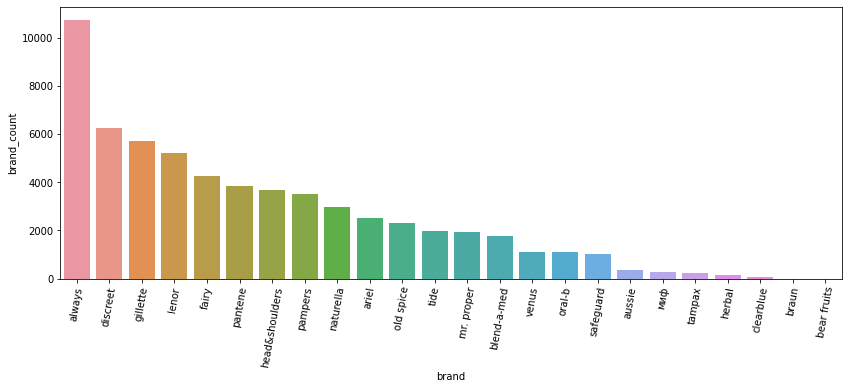

In [27]:
plt.figure(figsize=(14, 5))
sns.barplot(data=df_brand, x='brand', y='brand_count', 
                 order=df_brand.sort_values('brand_count', ascending=False)['brand'])
plt.xticks(rotation=80);

In [28]:
df_brand.sort_values('brand_count', ascending=False).head(3)

brand  brand_count
5     always        10737
8   discreet         6244
10  gillette         5718

In [29]:
# % of total sales
round(df_brand.sort_values('brand_count', ascending=False)['brand_count'].head(3) / df.shape[0] * 100, 1)

5     3.5
8     2.0
10    1.8
Name: brand_count, dtype: float64

In [30]:
df[df['brand'].str.contains('always') == True]['product_name'].value_counts().head()

always ежедневные прокладки удлиненные 16шт(proc    534
39124 alw.проклад.ultr.night duo 14шт               352
70526 alw.проклад.ultra super 16шт                  227
always platinum ultra прокладки ночные 6шт(прокт    208
always ultra прокладки normal/light 10шт(проктер    194
Name: product_name, dtype: int64

In [31]:
df[df['brand'].str.contains('discreet') == True]['product_name'].value_counts().head()

discreet deo ежедн прокладки waterlily 60 шт (пр    507
discreet deo ежедн прокладки waterli                503
2050868 discr.прокл.водн.лил.ежед. 60шт             413
2133901 discreet прокладки air ежед60шт             327
discreet deo ежедн прокладки water                  290
Name: product_name, dtype: int64

In [32]:
df[df['brand'].str.contains('gillette') == True]['product_name'].value_counts().head()

gillette mach3 кассеты д/станка 2шт (проктер):4/    220
gillette mach3 кассеты д/станка 4шт (проктер):4/    191
gillette пена д/бр д/чув200мл пена д/брлимон200м    120
gillette fusion кассеты д/станка 2шт (проктер):2    107
gillette mach3 кассеты д/станка 2шт                 100
Name: product_name, dtype: int64

In [33]:
print(df_brand['brand_count'].sum())
print(round(df_brand['brand_count'].sum() / df.shape[0] * 100, 1))

60971
19.7


## Answer to task 3

**a)**
In total, buyers bought 60,971 items of brands that are included in P&G, which is 19.7% of all purchased items.

**b)**
In terms of popularity among buyers, the following TOP-3 brands are included:

1. always - 10737 sales, or 3.5% of all sales
2. discreet - 6244 sales, or 2% of all sales
3. gillette - 5718 sales, or 1.8% of all sales

At what always and discreet are brands that sell mainly pads.